This assignment is first a k-means clustering algorithm that is used to create an n-chrome version of my face

The second question asks us to use SciPy's PCA classifier to classify the eigenfaces dataset 

The eigenfaces dataset is in this repo but can also be called with

``from sklearn import datasets
faces = datasets.fetch_olivetti_faces()``

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
def kmeansL2(X,K):
    xdim=X.shape[1]; ydim=X.shape[0]; rgb=X.shape[2] #extract picture dimensions
    # I want num_pixel number of x_i, so we flatten... should be able to recover later
    x=selfie.reshape(xdim*ydim,rgb)
    # generate K random 3 channel clusters
    mu_n=np.zeros((K,rgb))
    mu_o=np.zeros((K,rgb))
    for k in range(K):
        mu_n[k]=np.array([np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)])
    c=0; max_iter=1000 #counter because while loops and tolerances are annoying
    while np.sum((mu_o-mu_n)**2)>0.1:
        mu_o=mu_n
        l=np.zeros(x.shape[0])
        for i in range(x.shape[0]):
            lk=np.zeros(K)
            for k in range(K):
                lk[k]=np.sum(np.sqrt((x[i]-mu_o[k])**2)**2)
            l[i]=np.argmin(lk)
        for k in range(K):
            kron_l=np.zeros(l.shape)
            for i in range(kron_l.shape[0]):
                if l[i]==k:
                    kron_l[i]=1
            mu_n[k]=np.sum(kron_l.reshape(kron_l.shape[0],1)*x,axis=0)/np.sum(kron_l)
        c+=1
        if c>max_iter:
            print('max iterations: '+str(max_iter)+' surpassed. sum(delta mu = ' + str(np.sum((mu_o-mu_n)**2))+')')
            break
    out_x=np.zeros(x.shape)
    for i in range(x.shape[0]):
        index=int(l[i])
        out_x[i]=mu_n[index]
    return out_x

def kmeansL1(X,K):
    xdim=X.shape[1]; ydim=X.shape[0]; rgb=X.shape[2] #extract picture dimensions
    # I want num_pixel number of x_i, so we flatten... should be able to recover later
    x=selfie.reshape(xdim*ydim,rgb)
    # generate K random 3 channel clusters
    mu_n=np.zeros((K,rgb))
    mu_o=np.zeros((K,rgb))
    for k in range(K):
        mu_n[k]=np.array([np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)])
    c=0; max_iter=1000 #counter because while loops and tolerances are annoying
    while np.sum((mu_o-mu_n)**2)>0.1:
        mu_o=mu_n
        l=np.zeros(x.shape[0])
        for i in range(x.shape[0]):
            lk=np.zeros(K)
            for k in range(K):
                lk[k]=np.sum(np.abs(x[i]-mu_o[k]))
            l[i]=np.argmin(lk)
        for k in range(K):
            kron_l=np.zeros(l.shape)
            for i in range(kron_l.shape[0]):
                if l[i]==k:
                    kron_l[i]=1
            mu_n[k]=np.sum(kron_l.reshape(kron_l.shape[0],1)*x,axis=0)/np.sum(kron_l)
        c+=1
        if c>max_iter:
            print('max iterations: '+str(max_iter)+' surpassed. sum(delta mu = ' + str(np.sum((mu_o-mu_n)**2))+')')
            break
    out_x=np.zeros(x.shape)
    for i in range(x.shape[0]):
        index=int(l[i])
        out_x[i]=mu_n[index]
    return out_x

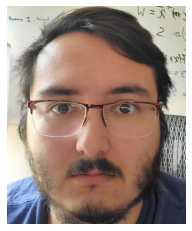

In [3]:
selfie=mpimg.imread('selfie.jpg')
plt.imshow(selfie)
plt.axis('off')
plt.show()

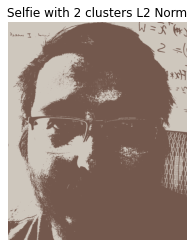

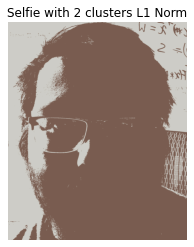

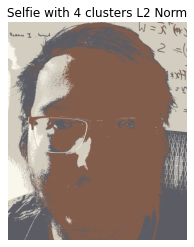

C:\Users\altai\Anaconda3\envs\mk3-020121\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in true_divide


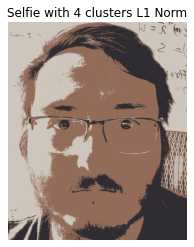

C:\Users\altai\Anaconda3\envs\mk3-020121\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


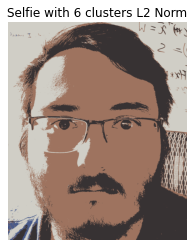

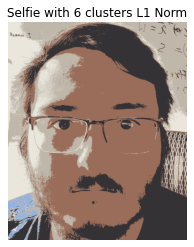

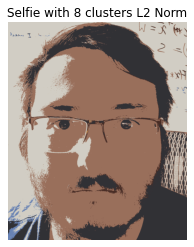

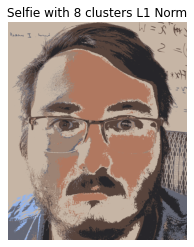

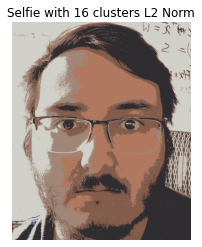

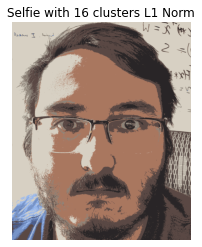

In [4]:
K=[2,4,6,8,16]

for k in K: 
    A=kmeansL2(selfie,k).reshape(selfie.shape)
    plt.imshow(A/255)
    plt.title('Selfie with ' + str(k) + ' clusters L2 Norm')
    plt.axis('off')
    plt.show()
    
    B=kmeansL1(selfie,k).reshape(selfie.shape)
    plt.imshow(B/255)
    plt.title('Selfie with ' + str(k) + ' clusters L1 Norm')
    plt.axis('off')
    plt.show()

``Encountered error in True Divide``

Can be rectified by adding 'machine epsilon' 
``np.finfo(float).eps)``
to knn code denominators. Doesn't break this implementation; so it's ok!

In [5]:
# now... PCA

from sklearn.decomposition import PCA

# Load these in
from skimage.io import imread
import pandas as pd
images=[]
widths=[]
for i in range(1,41):
    for j in  range(1,11):
        f = 'att_faces/s'+str(i)+ '/' +str(j) + '.pgm'
        images.append(imread(f))

images=np.array(images)
identity=[]
for i in range(10):
    for j in range(40):
        identity.append(i)
identity=np.array(identity)  
order=range(images.shape[0])
order=np.array(order)
identity=identity.reshape(identity.shape[0],1)
order=order.reshape(order.shape[0],1)
im_flat=images.reshape(images.shape[0],images.shape[1]*images.shape[2])
rng = np.random.default_rng()
linked=np.hstack((im_flat,identity))
linked=np.hstack((linked,order))
rng.shuffle(linked,axis=0) #we need to mix up the population because the original if well ordered and seperates people
ids=linked[:,-2]
orderr=linked[:,-1]
im_flatr=linked[:,:im_flat.shape[1]]

In [6]:
im_train=im_flatr[:int(0.6*im_flatr.shape[0])]
id_train=ids[:int(0.6*im_flatr.shape[0])]
orderr_train=orderr[:int(0.6*im_flatr.shape[0])]
im_test=im_flatr[int(0.6*im_flatr.shape[0]):]
id_test=ids[int(0.6*im_flatr.shape[0]):]
orderr_test=orderr[int(0.6*im_flatr.shape[0]):]

In [7]:
def var_pca(data,num_pc):
    pca = PCA(n_components=num_pc)
    PC=pca.fit_transform(data)
    return pca.components_,pca.singular_values_, pca.explained_variance_

In [8]:
many=var_pca(im_test,100) #pick k to be 100

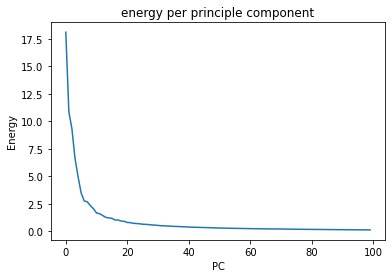

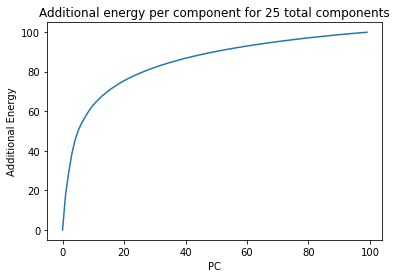

In [9]:
plt.plot(many[2]/np.sum(many[2])*100) # pca.explained_varience is the eigenvalues
plt.title('energy per principle component')
plt.xlabel('PC')
plt.ylabel('Energy')
plt.show()

cumul=np.zeros(many[2].shape[0])
for i in range(100):
    cumul[i]=np.sum(many[2][:i])/np.sum(many[2])
plt.plot(cumul*100) # pca.explained_varience is the eigenvalues
plt.title('Additional energy per component for 25 total components')
plt.xlabel('PC')
plt.ylabel('Additional Energy')
plt.show()

In [10]:
print('Number of principle components needed to get 50% energy: '+str(int(np.argwhere(cumul>=.5)[0])))
print('Energy captured by first 25 components: ' + str(round(cumul[25]*100)) +'%)')

Number of principle components needed to get 50% energy: 6
Energy captured by first 25 components: 79%)


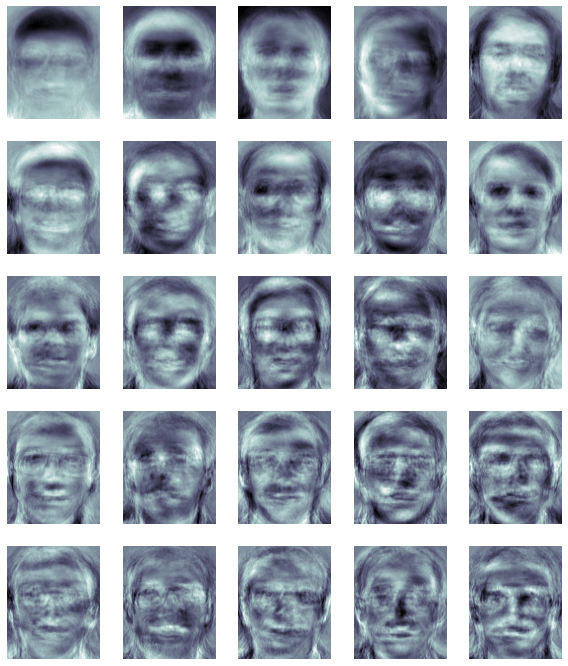

In [11]:
#pca.compoenents_ sounds a lot like eigenvectors
fig,axs=plt.subplots(5,5,figsize=(10,12))
eigenfaces=many[0][:25].reshape(25,images.shape[1],images.shape[2])
c=0
for i in range(5):
    for j in range(5):
        axs[i,j].imshow(eigenfaces[c],cmap='bone')
        axs[i,j].axis('off')
        c+=1
# Prints EigenFaces

In [12]:
im_test_shift = im_test-np.sum(im_train)/im_train.shape[0]
im_train_shift = im_train-np.sum(im_train)/im_train.shape[0]
test_proj=np.matmul(im_test_shift,many[0][:25].T)
train_proj=np.matmul(im_train_shift,many[0][:25].T)

In [14]:
#From HW1
from scipy import stats # To get the mode of an array
def dist(x1,x2): #cut down on writing
    d=np.sqrt(np.sum((x1-x2)**2))    
    return d

def knn(xtrain,ytrain,xtest,ytest,num_nearest_neighbors):
    n=num_nearest_neighbors
    y_class=[]
    correct_array = np.zeros(len(ytest))
    for i in range(len(ytest)): # for each test image
        Ds=[] # reinitializes the distances vector
        for j in range(len(ytrain)): # for each training image (whose label is known)
            Ds.append(dist(xtest[i],xtrain[j])) 
        sortedDs=np.sort(Ds) #gets minimum distances
        top_inds=[] #initializes a storage vector for the indices of the minimum values
        for j in range(n):
            top_inds=np.append(top_inds,np.where(Ds==sortedDs[j])[0]).astype(int) #gets indicies of minimum values
        comparisons=[]
        for j in top_inds: # The next couple lines looks to see if the vectors were accurately labelled
            comparisons.append(ytrain[j])
        y_class=np.append(y_class,stats.mode(comparisons)[0]).astype(int) #Classifies with the category that makes up most of the points surrounding the class
        if y_class[i]==ytest[i]:
            correct_array[i]=1

    num_correct=np.sum(np.sum(correct_array))
    percent_success = num_correct/len(ytest)
    return y_class,correct_array, percent_success

In [15]:
A=knn(train_proj,id_train,test_proj,id_test,1)

In [16]:
incorrect_images=images[[orderr_test[A[1]==0]]]

C:\Users\altai\Anaconda3\envs\mk3-020121\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


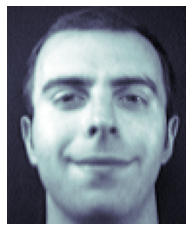

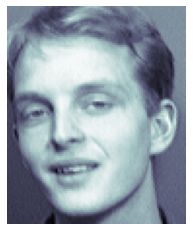

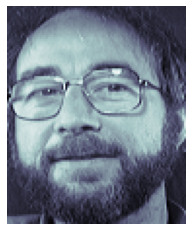

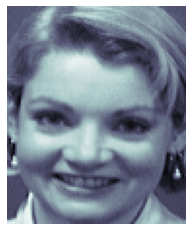

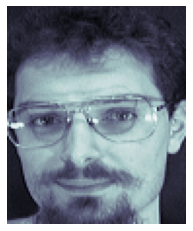

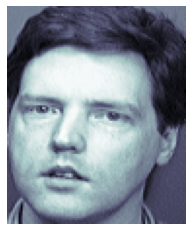

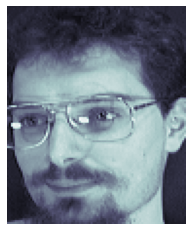

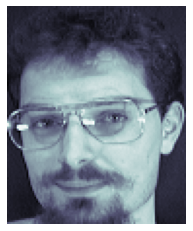

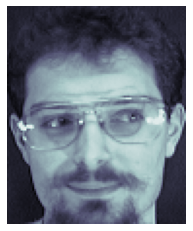

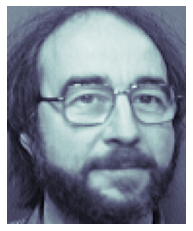

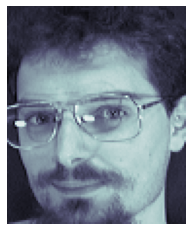

In [17]:
for i in range(incorrect_images.shape[0]):
    plt.imshow(incorrect_images[i],cmap='bone')
    plt.axis('off')
    plt.show()

It can't figure out head tilts and smiles. It also had a hard time with glasses. There is one man in glasses that shows up a bunch. This means the random sort most likely put most of his images in the test dataset - an unbalenced dataset. 

In [19]:
print('PCA classification accuracy is: '+str(round(A[2]*100))+'%')

PCA classification accuracy is: 93%


In [24]:
# Repeat KNN on same PCA
A=knn(train_proj,id_train,test_proj,id_test,2) #more nearest neighbors reduce classification accuracy

PCA classification accuracy is: 83%


C:\Users\altai\Anaconda3\envs\mk3-020121\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


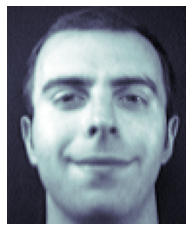

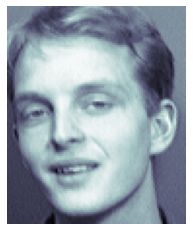

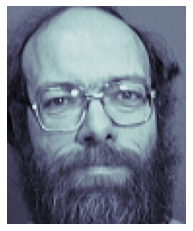

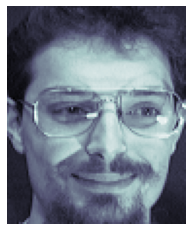

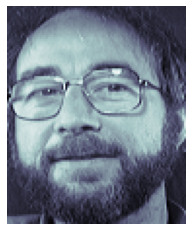

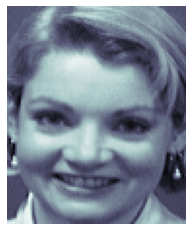

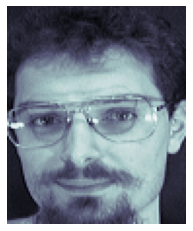

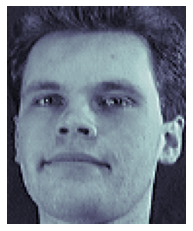

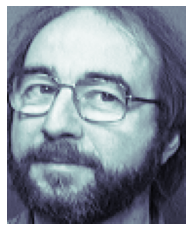

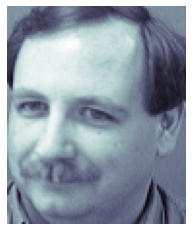

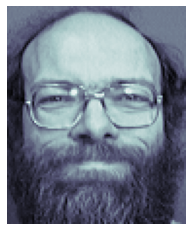

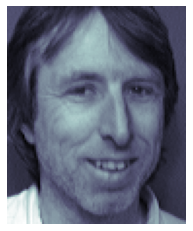

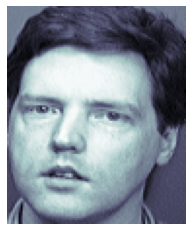

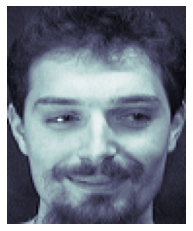

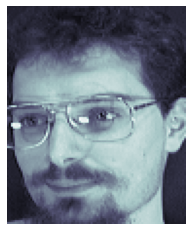

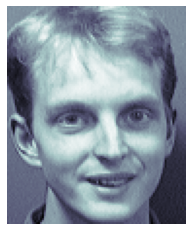

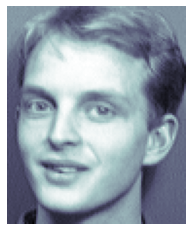

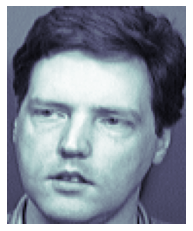

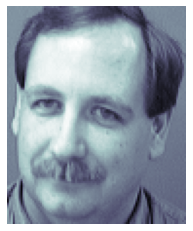

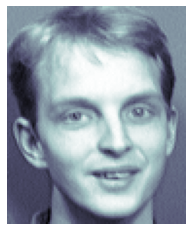

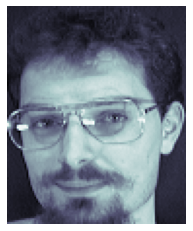

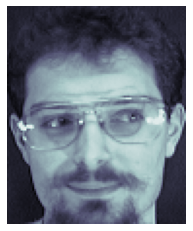

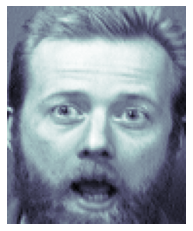

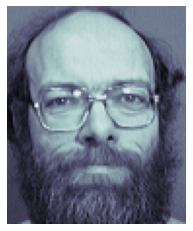

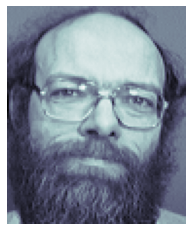

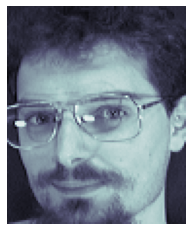

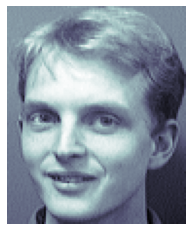

In [25]:
print('PCA classification accuracy is: '+str(round(A[2]*100))+'%')
incorrect_images=images[[orderr_test[A[1]==0]]]
for i in range(incorrect_images.shape[0]):
    plt.imshow(incorrect_images[i],cmap='bone')
    plt.axis('off')
    plt.show()

Ran KNN with more neighbors (2). Decreased accuracy. All the same pictures from the previous case pop up and additional photos taken at off angles are included